In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('final.csv', delimiter=",")

In [4]:
df['label'].value_counts()

0    35378
1    11566
Name: label, dtype: int64

# Visual LOOK

<AxesSubplot:xlabel='label', ylabel='count'>

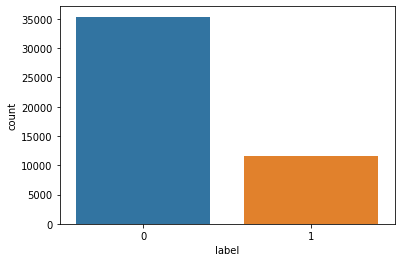

In [6]:
sns.countplot(x = 'label', data = df, order = df['label'].value_counts().index)

In [10]:
df.duplicated().sum()

0

In [9]:
# remove duplicated values
df = df.drop_duplicates(keep='first')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38069 entries, 0 to 46943
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   url                 38069 non-null  object
 1   use_of_ip           38069 non-null  int64 
 2   abnormal_url        38069 non-null  int64 
 3   count.              38069 non-null  int64 
 4   count-www           38069 non-null  int64 
 5   count@              38069 non-null  int64 
 6   count_dir           38069 non-null  int64 
 7   count_embed_domian  38069 non-null  int64 
 8   short_url           38069 non-null  int64 
 9   count-https         38069 non-null  int64 
 10  count-http          38069 non-null  int64 
 11  count%              38069 non-null  int64 
 12  count?              38069 non-null  int64 
 13  count-              38069 non-null  int64 
 14  count=              38069 non-null  int64 
 15  url_length          38069 non-null  int64 
 16  hostname_length     38

# Feature Selection

In [12]:
#Predictor Variables
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['label']

# Class Distribution

<AxesSubplot:ylabel='label'>

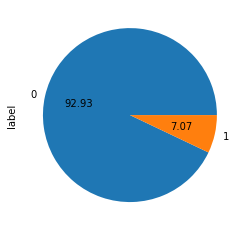

In [13]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x2543f4b2610>,
 [Text(-1.0729877295338506, 0.24227532327868778, '35378'),
  Text(1.0729877465464375, -0.2422752479334165, '2691')],
 [Text(-0.5852660342911912, 0.1321501763338297, '92.93'),
  Text(0.5852660435707839, -0.13215013523640898, '7.07')])

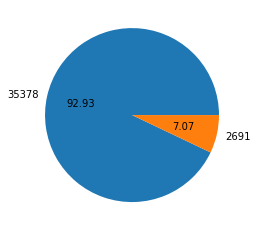

In [14]:
# Show pie plot (Approach 2)
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=y.value_counts())

# Data Splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30455, 21), (30455,), (7614, 21), (7614,))

<AxesSubplot:ylabel='label'>

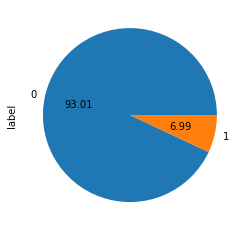

In [17]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

In [18]:
y_train.value_counts()

0    28325
1     2130
Name: label, dtype: int64

# Class Balancing

## Random undersampling

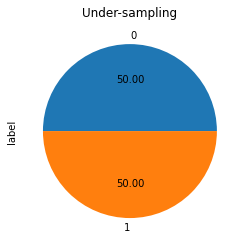

In [19]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [20]:
# Class distribution
y_train_rus.value_counts()

0    2130
1    2130
Name: label, dtype: int64

## Random Oversampling

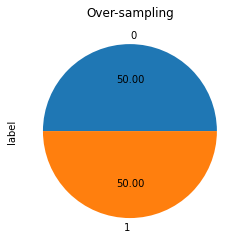

In [21]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [22]:
y_train_ros.value_counts()

0    28325
1    28325
Name: label, dtype: int64

# Model building with/without class balancing

## 1. Model Building without class balancing

In [23]:
# Training Random Forest Models
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train, y_train, cv=10, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Performa DataTraining
print(confusion_matrix(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))

#Performa Data Test
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))
  
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()
print(cv['test_MCC'])

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df1 = pd.concat([df_labels, df_values], axis=1)
df1

[[28324     1]
 [    0  2130]]
0.999967164669184
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       1.00      1.00      1.00      2130

    accuracy                           1.00     30455
   macro avg       1.00      1.00      1.00     30455
weighted avg       1.00      1.00      1.00     30455

[[7048    5]
 [  19  542]]
0.9968479117415288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7053
           1       0.99      0.97      0.98       561

    accuracy                           1.00      7614
   macro avg       0.99      0.98      0.99      7614
weighted avg       1.00      1.00      1.00      7614

[0.98477261 0.98221808 0.9873264  0.98477496 0.97454253 0.98477225
 0.96158924 0.97194396 0.95900295 0.97965821]


,Performance_metric_names,Performance_metric_values
0,MCC_train,0.999748
1,MCC_CV,0.977060
2,MCC_test,0.976731


## 2. Model building with undersampled balance class

In [24]:
# Training Random Forest Models
model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_rus, y_train_rus, cv=10, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_rus)
y_test_pred = model.predict(X_test)

# Performa DataTraining
print(confusion_matrix(y_train_rus,y_train_pred))
print(accuracy_score(y_train_rus,y_train_pred))
print(classification_report(y_train_rus,y_train_pred))

#Performa Data Test
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))
  
mcc_train = matthews_corrcoef(y_train_rus, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()
print(cv['test_MCC'])

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df2 = pd.concat([df_labels, df_values], axis=1)
df2

[[2130    0]
 [   0 2130]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2130
           1       1.00      1.00      1.00      2130

    accuracy                           1.00      4260
   macro avg       1.00      1.00      1.00      4260
weighted avg       1.00      1.00      1.00      4260

[[7002   51]
 [   5  556]]
0.9926451273969005
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7053
           1       0.92      0.99      0.95       561

    accuracy                           0.99      7614
   macro avg       0.96      0.99      0.97      7614
weighted avg       0.99      0.99      0.99      7614

[0.99531613 0.98126392 0.99531613 0.98126392 0.98126392 0.98139372
 0.95801046 0.9860133  0.94920452 0.98592636]


,Performance_metric_names,Performance_metric_values
0,MCC_train,1.000000
1,MCC_CV,0.979497
2,MCC_test,0.948942


## 3. Model with oversampling balance class

In [25]:
# Training Random Forest Models
model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Training Cross-validation Models
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import cross_validate

model_cv = RandomForestClassifier(random_state=42)
cv_scoring = {'MCC': make_scorer(matthews_corrcoef)}
cv = cross_validate(model_cv, X_train_ros, y_train_ros, cv=10, scoring=cv_scoring)

# Apply model to make prediction
from sklearn.metrics import matthews_corrcoef

y_train_pred = model.predict(X_train_ros)
y_test_pred = model.predict(X_test)

# Performa DataTraining
print(confusion_matrix(y_train_ros,y_train_pred))
print(accuracy_score(y_train_ros,y_train_pred))
print(classification_report(y_train_ros,y_train_pred))

#Performa Data Test
print(confusion_matrix(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))
  
mcc_train = matthews_corrcoef(y_train_ros, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_cv = cv['test_MCC'].mean()
print(cv['test_MCC'])

# Display model performance results
df_labels = pd.Series(['MCC_train', 'MCC_CV', 'MCC_test'], name = 'Performance_metric_names')
df_values = pd.Series([mcc_train, mcc_cv, mcc_test], name = 'Performance_metric_values')
df3 = pd.concat([df_labels, df_values], axis=1)
df3

[[28324     1]
 [    0 28325]]
0.999982347749338
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28325
           1       1.00      1.00      1.00     28325

    accuracy                           1.00     56650
   macro avg       1.00      1.00      1.00     56650
weighted avg       1.00      1.00      1.00     56650

[[7047    6]
 [  18  543]]
0.9968479117415288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7053
           1       0.99      0.97      0.98       561

    accuracy                           1.00      7614
   macro avg       0.99      0.98      0.99      7614
weighted avg       1.00      1.00      1.00      7614

[1.         1.         0.99964702 0.99964702 0.99964702 1.
 0.99929416 0.99929416 1.         0.99964702]


,Performance_metric_names,Performance_metric_values
0,MCC_train,0.999965
1,MCC_CV,0.999718
2,MCC_test,0.976745


# Summary of Model Performance

In [26]:
df = pd.concat([df1.Performance_metric_values,
                df2.Performance_metric_values,
                df3.Performance_metric_values], axis=1)
df.columns = ['No class balancing', 'Class balancing (undersampling)', 'Class balancing (oversampling)']
df = df.T
df.columns = ['Training', 'CV', 'Test']
df

,Training,CV,Test
No class balancing,0.999748,0.977060,0.976731
Class balancing (undersampling),1.000000,0.979497,0.948942
Class balancing (oversampling),0.999965,0.999718,0.976745


In [27]:
X_train_ros.to_csv(r'C:\Users\VA2N\TA\final2\features_ros.csv')

In [28]:
# Menyimpan model Random Forest
import pickle
pickle.dump(model, open('modelRF.pkl', 'wb'))